### OLS Task02

#### 한국 아파트 가격 예측
https://drive.google.com/file/d/1v3eNjo3TjTgUPlq6Uw_v_oEQ8sVjaItw/view?usp=share_link

In [43]:
import pandas as pd

k_df = pd.read_csv('./datasets/korean_apart.csv', low_memory=False)
k_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [44]:
k_df.isna().sum()

지역코드      0
동         0
거래일       0
아파트       0
지번      438
전용면적      0
층         0
건축년도     76
거래금액      0
dtype: int64

In [45]:
k_df[k_df['지번'].isna()]

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
187885,41590.0,남양읍 남양리,2/5/2020 0:00,동광뷰엘,NaN,80.0082,27,2018.0,30700
187888,41590.0,남양읍 남양리,2/8/2020 0:00,동광뷰엘,NaN,80.0082,4,2018.0,29400
187890,41590.0,남양읍 남양리,2/9/2020 0:00,동광뷰엘,NaN,80.0082,20,2018.0,31500
187897,41590.0,남양읍 남양리,2/14/2020 0:00,동광뷰엘,NaN,82.3822,16,2018.0,29500
187919,41590.0,남양읍 남양리,2/23/2020 0:00,동광뷰엘,NaN,80.0082,33,2018.0,32000
...,...,...,...,...,...,...,...,...,...
4796439,36110.0,나성동,2023-01-01 00:00:00,나릿재마을1단지,NaN,84.7595,2,2021.0,"59,500"
4796846,36110.0,나성동,2023-02-22 00:00:00,나릿재마을1단지,NaN,84.9630,9,2021.0,"78,500"
4797382,36110.0,나성동,2023-03-15 00:00:00,나릿재마을1단지,NaN,84.9298,5,2021.0,"70,000"
4797886,36110.0,나성동,2023-04-07 00:00:00,나릿재마을1단지,NaN,112.5934,29,2021.0,"130,000"


In [46]:
k_df[k_df['아파트'] == '나릿재마을1단지']

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
4458542,36110.0,나성동,2022-07-19 00:00:00,나릿재마을1단지,NaN,84.9649,30,2021.0,"90,000"
4459655,36110.0,나성동,2023-01-01 00:00:00,나릿재마을1단지,NaN,84.7595,2,2021.0,"59,500"
4460062,36110.0,나성동,2023-02-22 00:00:00,나릿재마을1단지,NaN,84.9630,9,2021.0,"78,500"
4460598,36110.0,나성동,2023-03-15 00:00:00,나릿재마을1단지,NaN,84.9298,5,2021.0,"70,000"
4461102,36110.0,나성동,2023-04-07 00:00:00,나릿재마을1단지,NaN,112.5934,29,2021.0,"130,000"
4461111,36110.0,나성동,2023-04-26 00:00:00,나릿재마을1단지,NaN,84.7595,8,2021.0,"81,000"
4795326,36110.0,나성동,2022-07-19 00:00:00,나릿재마을1단지,NaN,84.9649,30,2021.0,"90,000"
4796439,36110.0,나성동,2023-01-01 00:00:00,나릿재마을1단지,NaN,84.7595,2,2021.0,"59,500"
4796846,36110.0,나성동,2023-02-22 00:00:00,나릿재마을1단지,NaN,84.9630,9,2021.0,"78,500"
4797382,36110.0,나성동,2023-03-15 00:00:00,나릿재마을1단지,NaN,84.9298,5,2021.0,"70,000"


In [47]:
k_df[k_df['지역코드'] == 36110.0]

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
13911,36110.0,고운동,1/2/2020 0:00,가락마을3단지(호반베르디움),1708,84.9893,1,2014.0,31800
13912,36110.0,고운동,1/2/2020 0:00,가락마을22단지(에듀힐스),1387,96.1416,7,2015.0,37700
13913,36110.0,고운동,1/2/2020 0:00,가락마을5단지(유승한내들),1705,59.9013,4,2015.0,24500
13914,36110.0,고운동,1/2/2020 0:00,가락마을 20단지(호반베르디움5차),1396,59.9897,2,2015.0,21000
13915,36110.0,고운동,1/2/2020 0:00,가락마을8단지(고운뜰아파트),1706,84.9800,21,2015.0,32000
...,...,...,...,...,...,...,...,...,...
4798193,36110.0,장군면 금암리,2023-04-05 00:00:00,영조정보마을임대아파트,259-1,28.2616,3,2002.0,"3,350"
4798194,36110.0,연서면 봉암리,2023-04-13 00:00:00,대원네스트빌,622,59.8580,1,2002.0,"17,900"
4798195,36110.0,연서면 봉암리,2023-04-13 00:00:00,대원네스트빌,622,59.8580,5,2002.0,"18,700"
4798196,36110.0,연서면 봉암리,2023-04-13 00:00:00,대원네스트빌,622,59.8580,9,2002.0,"19,600"


In [48]:
k_df = k_df[~k_df['지번'].isna()]
k_df=k_df.reset_index(drop=True)
k_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002396,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002397,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002398,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002399,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [49]:
k_df.isna().sum()

지역코드     0
동        0
거래일      0
아파트      0
지번       0
전용면적     0
층        0
건축년도    76
거래금액     0
dtype: int64

In [50]:
k_df = k_df[~k_df['건축년도'].isna()].reset_index(drop=True)
k_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002320,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002321,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002322,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002323,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [51]:
k_df.isna().sum()

지역코드    0
동       0
거래일     0
아파트     0
지번      0
전용면적    0
층       0
건축년도    0
거래금액    0
dtype: int64

In [52]:
k_df.duplicated().sum()

283891

In [53]:
k_df = k_df.drop_duplicates()

In [54]:
k_df = k_df.reset_index(drop=True)

In [55]:
k_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
4718429,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
4718430,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
4718431,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
4718432,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [56]:
k_df['아파트'].value_counts()

아파트
현대                      40017
주공                      15004
성원                      14739
삼성                      14655
주공2                     14273
                        ...  
새나루마을9단지세종어울림파밀리에센트럴        1
나릿재마을2단지                    1
새나루마을4단지                    1
승정빌라                        1
중문스마트빌                      1
Name: count, Length: 36432, dtype: int64

In [57]:
columns = ['전용면적','층','건축년도','거래금액']
pre_k_df = k_df[columns]
pre_k_df

,전용면적,층,건축년도,거래금액
0,135.5800,8,1991.0,26700
1,101.6000,2,2006.0,35500
2,84.9920,11,2007.0,36500
3,118.7060,8,2006.0,43000
4,84.9636,7,2007.0,38700
...,...,...,...,...
4718429,57.1300,6,2019.0,"19,500"
4718430,49.8700,2,1999.0,"21,700"
4718431,45.3100,1,2000.0,"9,300"
4718432,51.8800,2,2003.0,"25,500"


array([[<Axes: title={'center': '지역코드'}>,
        <Axes: title={'center': '전용면적'}>],
       [<Axes: title={'center': '건축년도'}>, <Axes: >]], dtype=object)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from curre

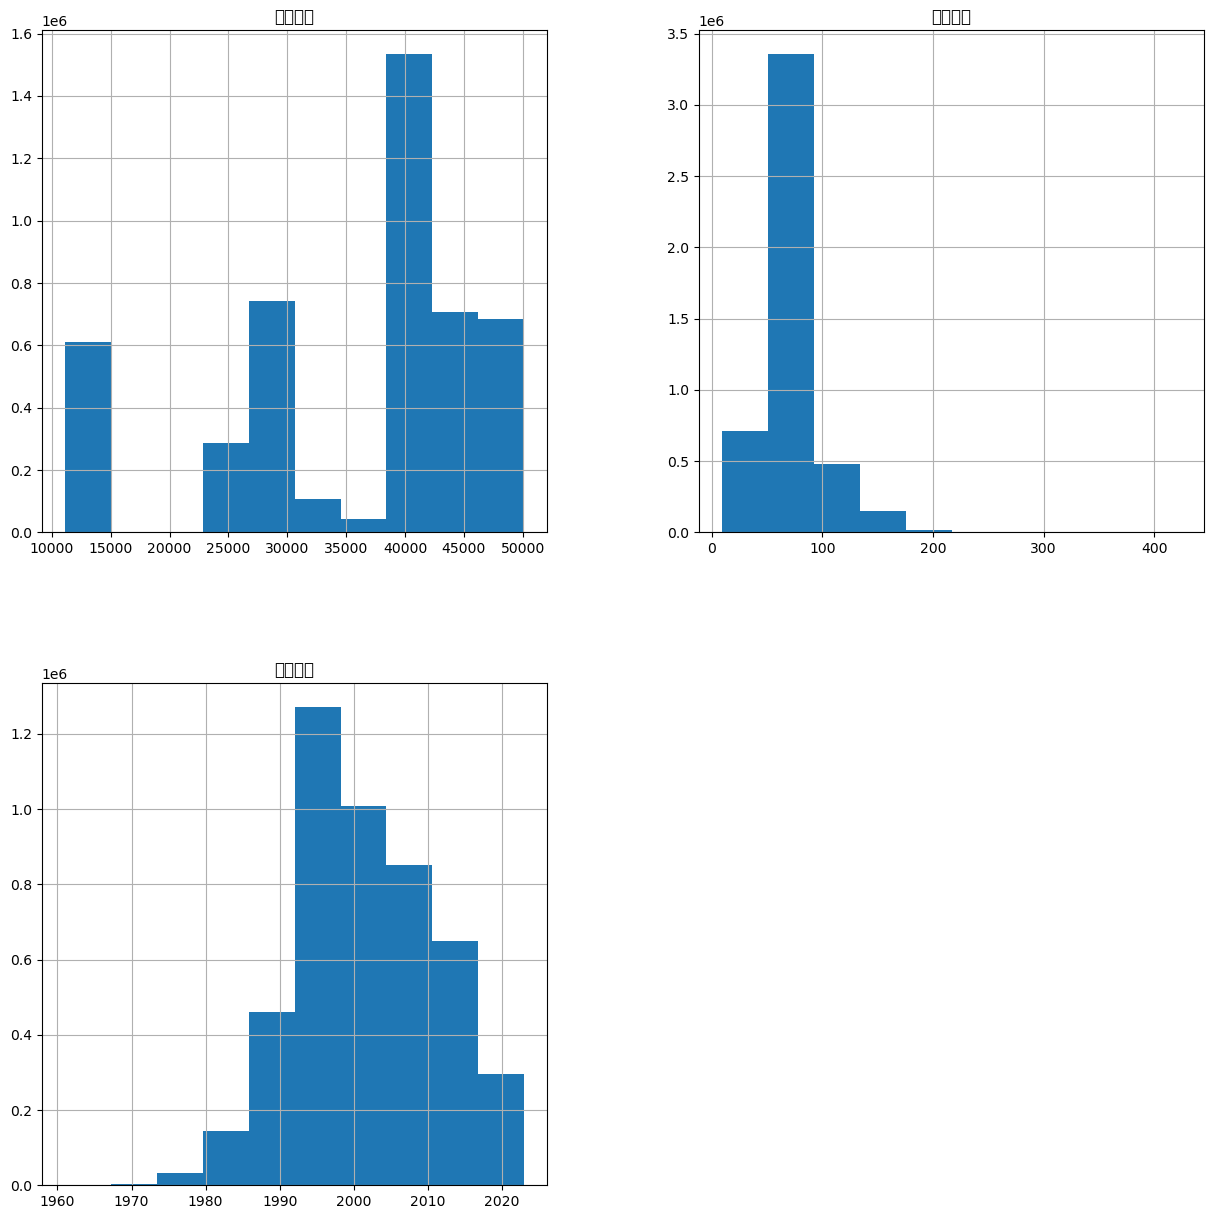

In [16]:
pre_k_df.hist(figsize=(15,15))

In [59]:
pre_k_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718434 entries, 0 to 4718433
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   전용면적    float64
 1   층       object 
 2   건축년도    float64
 3   거래금액    object 
dtypes: float64(2), object(2)
memory usage: 144.0+ MB


In [60]:
pre_k_df['층'].value_counts()

층
5       342570
4       341084
3       332233
2       319099
1       290827
         ...  
83           1
81           1
             1
-4           1
50.0         1
Name: count, Length: 139, dtype: int64

In [61]:
import numpy as np

pre_k_df['층'] = pre_k_df['층'].str.strip()

C:\Users\kangh\AppData\Local\Temp\ipykernel_7968\323607215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_k_df['층'] = pre_k_df['층'].str.strip()


In [62]:
pre_k_df = pre_k_df[~(pre_k_df['층'] == '')].reset_index(drop=True)
pre_k_df

,전용면적,층,건축년도,거래금액
0,135.5800,8,1991.0,26700
1,101.6000,2,2006.0,35500
2,84.9920,11,2007.0,36500
3,118.7060,8,2006.0,43000
4,84.9636,7,2007.0,38700
...,...,...,...,...
4718428,57.1300,6,2019.0,"19,500"
4718429,49.8700,2,1999.0,"21,700"
4718430,45.3100,1,2000.0,"9,300"
4718431,51.8800,2,2003.0,"25,500"


In [63]:
pre_k_df['층'] = pre_k_df['층'].astype(float)

In [64]:
pre_k_df['층'] = pre_k_df['층'].astype(int)
pre_k_df

,전용면적,층,건축년도,거래금액
0,135.5800,8,1991.0,26700
1,101.6000,2,2006.0,35500
2,84.9920,11,2007.0,36500
3,118.7060,8,2006.0,43000
4,84.9636,7,2007.0,38700
...,...,...,...,...
4718428,57.1300,6,2019.0,"19,500"
4718429,49.8700,2,1999.0,"21,700"
4718430,45.3100,1,2000.0,"9,300"
4718431,51.8800,2,2003.0,"25,500"


In [65]:
pre_k_df['거래금액'] = pre_k_df['거래금액'].str.replace(',', '')
pre_k_df['거래금액'] = pre_k_df['거래금액'].astype(int)
pre_k_df['거래금액']

0          26700
1          35500
2          36500
3          43000
4          38700
           ...  
4718428    19500
4718429    21700
4718430     9300
4718431    25500
4718432    52500
Name: 거래금액, Length: 4718433, dtype: int32

In [66]:
pre_k_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718433 entries, 0 to 4718432
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   전용면적    float64
 1   층       int32  
 2   건축년도    float64
 3   거래금액    int32  
dtypes: float64(2), int32(2)
memory usage: 108.0 MB


In [71]:
k_df.loc[:, '거래일'] = pd.to_datetime(k_df.거래일, dayfirst=True, format='mixed')
k_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,2020-05-30 00:00:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,2020-03-01 00:00:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,2020-03-01 00:00:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,2020-03-01 00:00:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,2020-04-01 00:00:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
4718429,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
4718430,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
4718431,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
4718432,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [73]:
k_df['거래금액'] = k_df['거래금액'].str.replace(',', '')
k_df['거래금액'] = k_df['거래금액'].astype(int)
k_df['거래금액']

0          26700
1          35500
2          36500
3          43000
4          38700
           ...  
4718429    19500
4718430    21700
4718431     9300
4718432    25500
4718433    52500
Name: 거래금액, Length: 4718434, dtype: int32

In [75]:
group_a_df = k_df[['거래일','거래금액']].groupby('거래일').sum('거래금액').reset_index()
group_a_df

,거래일,거래금액
0,2015-01-01,6576349
1,2015-01-02,37089856
2,2015-01-03,44956816
3,2015-01-04,11973972
4,2015-01-05,55922619
...,...,...
3105,2023-07-03,356150
3106,2023-07-04,492160
3107,2023-07-05,452360
3108,2023-07-06,263550


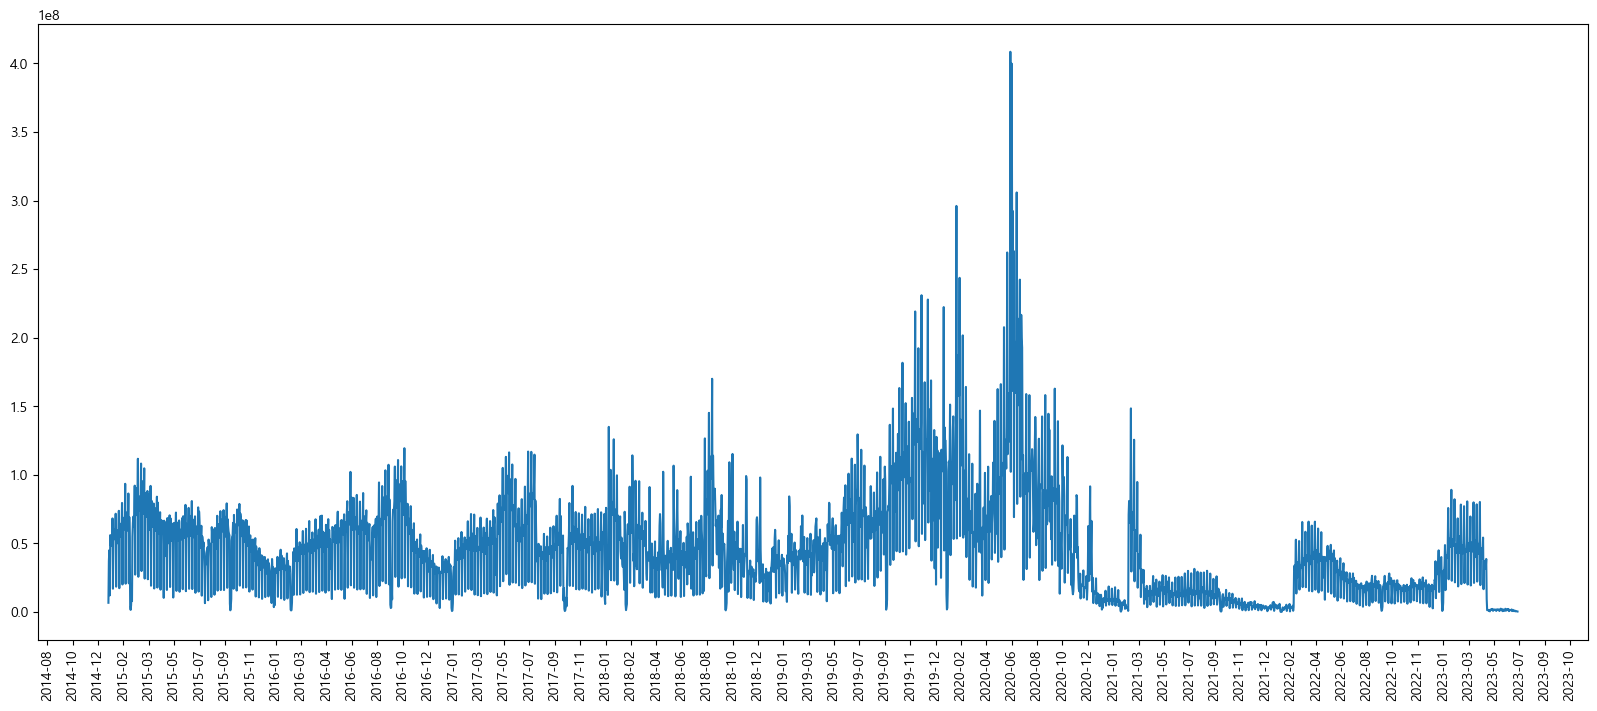

In [76]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 8))

date_format = mdates.DateFormatter('%Y-%m')

# 8주 단위
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))
ax.xaxis.set_major_formatter(date_format)
ax.plot(group_a_df['거래일'], group_a_df['거래금액'])
plt.xticks(rotation=90)
plt.show()

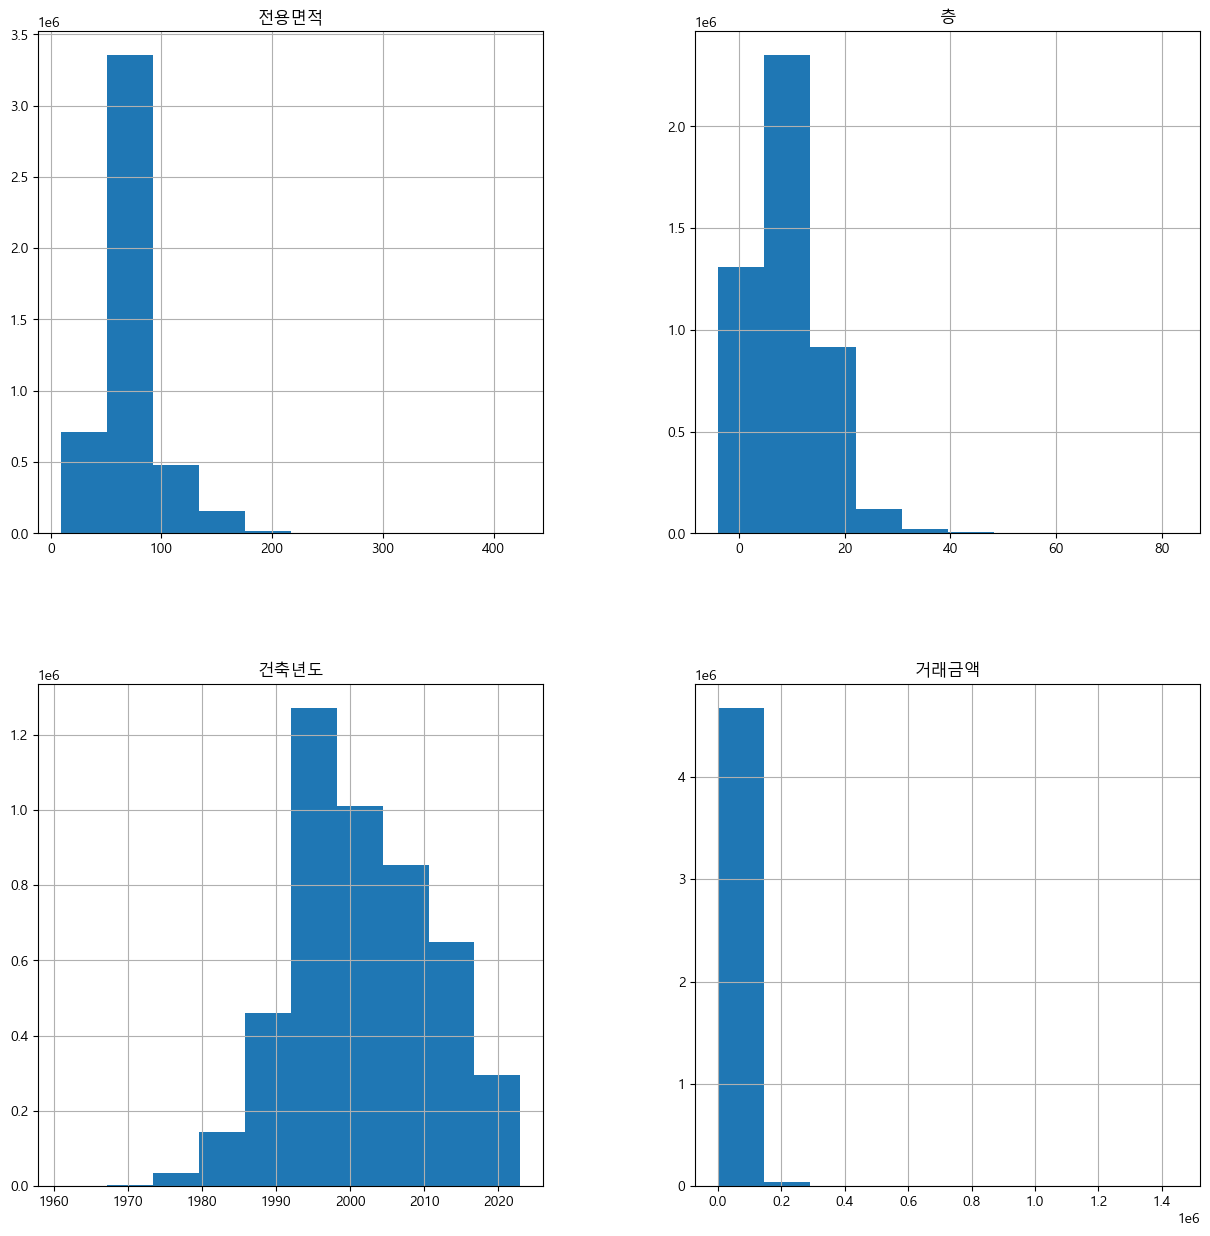

In [67]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
pre_k_df.hist(figsize=(15,15))
plt.show()

<Axes: >

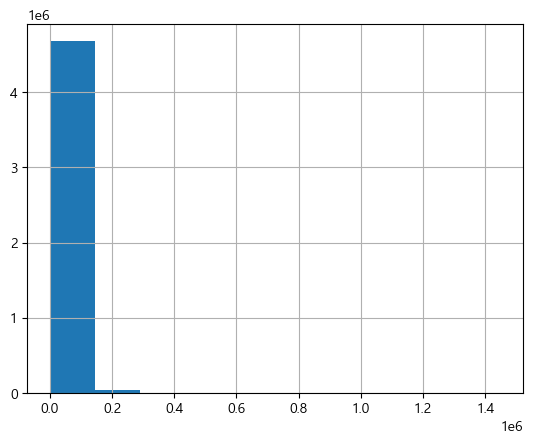

In [77]:
pre_k_df['거래금액'].hist()

In [78]:
pre_k_df['거래금액'].sort_values(ascending=False)

4320407    1450000
4305511    1350000
4306012    1300000
4271521    1200000
4271498    1170000
            ...   
3993868        350
3993867        350
3993866        350
3993865        350
2938619        100
Name: 거래금액, Length: 4718433, dtype: int32

4718433

<Axes: >

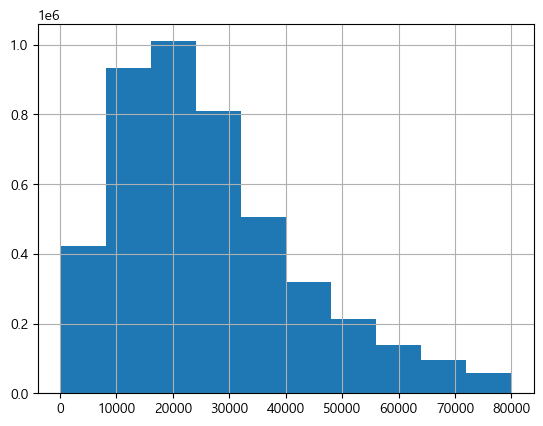

In [79]:
(pre_k_df[pre_k_df['거래금액'] <80000]['거래금액']).hist()

In [80]:
pre_k_df = pre_k_df[pre_k_df['거래금액'] < 80000].reset_index(drop=True)

In [81]:
pre_k_df

,전용면적,층,건축년도,거래금액
0,135.5800,8,1991.0,26700
1,101.6000,2,2006.0,35500
2,84.9920,11,2007.0,36500
3,118.7060,8,2006.0,43000
4,84.9636,7,2007.0,38700
...,...,...,...,...
4505269,57.1300,6,2019.0,19500
4505270,49.8700,2,1999.0,21700
4505271,45.3100,1,2000.0,9300
4505272,51.8800,2,2003.0,25500


<Axes: >

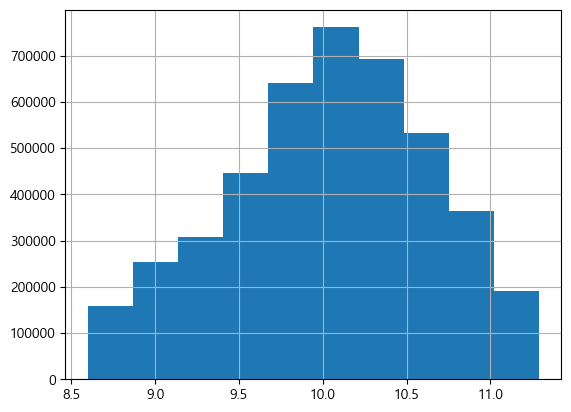

In [82]:
np.log1p(pre_k_df['거래금액'])[np.log1p(pre_k_df['거래금액'])> 8.6].hist()

In [83]:
indices = pre_k_df[np.log1p(pre_k_df['거래금액'])> 8.6].index
pre_k_df = pre_k_df.loc[indices].reset_index(drop=True)
pre_k_df

,전용면적,층,건축년도,거래금액
0,135.5800,8,1991.0,26700
1,101.6000,2,2006.0,35500
2,84.9920,11,2007.0,36500
3,118.7060,8,2006.0,43000
4,84.9636,7,2007.0,38700
...,...,...,...,...
4348935,57.1300,6,2019.0,19500
4348936,49.8700,2,1999.0,21700
4348937,45.3100,1,2000.0,9300
4348938,51.8800,2,2003.0,25500


<Axes: >

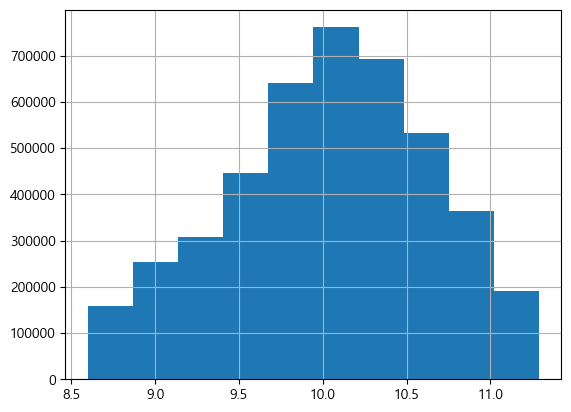

In [84]:
np.log1p(pre_k_df['거래금액']).hist()

In [85]:
pre_k_df['거래금액'] = np.log1p(pre_k_df['거래금액'])
pre_k_df

,전용면적,층,건축년도,거래금액
0,135.5800,8,1991.0,10.192456
1,101.6000,2,2006.0,10.477316
2,84.9920,11,2007.0,10.505095
3,118.7060,8,2006.0,10.668979
4,84.9636,7,2007.0,10.563621
...,...,...,...,...
4348935,57.1300,6,2019.0,9.878221
4348936,49.8700,2,1999.0,9.985114
4348937,45.3100,1,2000.0,9.137877
4348938,51.8800,2,2003.0,10.146473


array([[<Axes: title={'center': '전용면적'}>, <Axes: title={'center': '층'}>],
       [<Axes: title={'center': '건축년도'}>,
        <Axes: title={'center': '거래금액'}>]], dtype=object)

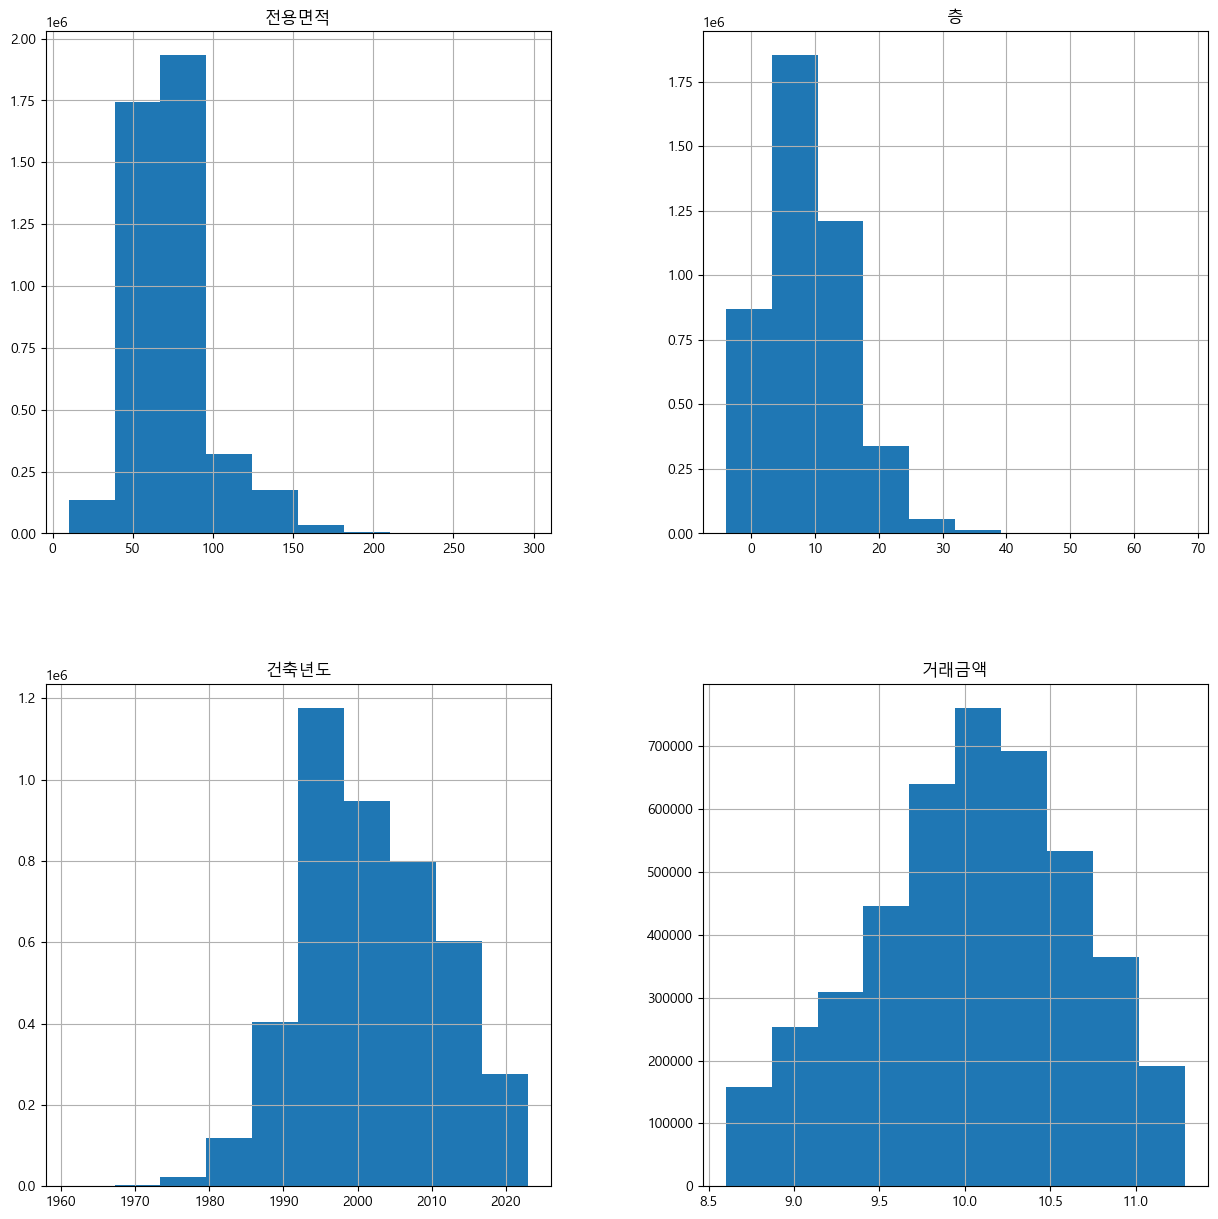

In [86]:
pre_k_df.hist(figsize=(15,15))

In [87]:
pre_k_df.corr()['거래금액'].sort_values(ascending=False)[1:]

전용면적    0.530706
건축년도    0.358091
층       0.230258
Name: 거래금액, dtype: float64

<Axes: >

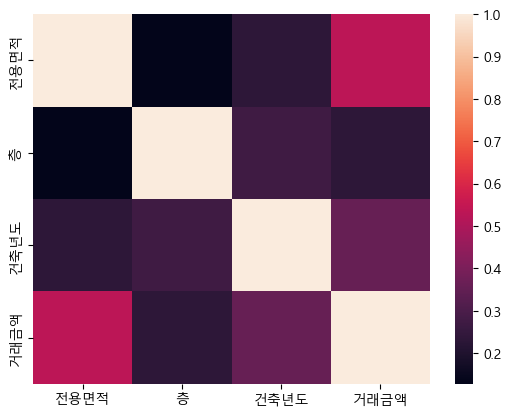

In [88]:
import seaborn as sns

sns.heatmap(pre_k_df.corr())

In [89]:
from statsmodels.api import OLS

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          5.948e+08
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:59:36   Log-Likelihood:                     -3.1210e+06
No. Observations:             4348940   AIC:                                  6.242e+06
Df Residuals:                 4348937   BIC:                                  6.242e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [91]:
get_vif(features)

,vif_score,feature
0,10.774279,전용면적
1,3.273722,층
2,11.865724,건축년도


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


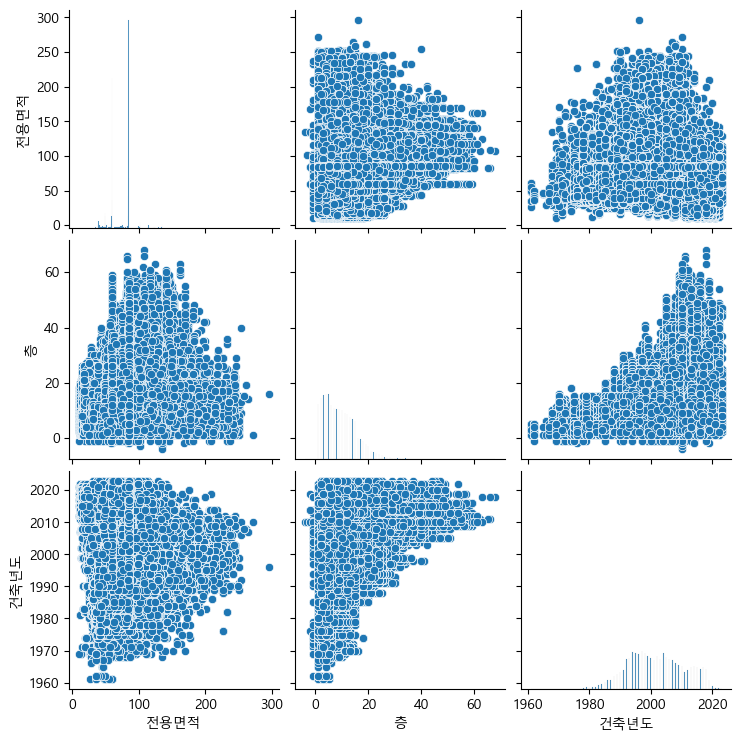

In [92]:
sns.pairplot(features)

In [93]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [95]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2381, RMSE: 0.4880, MSLE: 0.0020, RMSLE: 0.0445, R2: 0.3527


### PowerTransformer

In [96]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

# ptf = PowerTransformer(method='box-cox', standardize=False)
ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_k_df[['거래금액']])
pre_k_df['Target_yeo'] = result
pre_k_df

,전용면적,층,건축년도,거래금액,Target_yeo
0,135.5800,8,1991.0,10.192456,233.978591
1,101.6000,2,2006.0,10.477316,250.214113
2,84.9920,11,2007.0,10.505095,251.833838
3,118.7060,8,2006.0,10.668979,261.522719
4,84.9636,7,2007.0,10.563621,255.267726
...,...,...,...,...,...
4348935,57.1300,6,2019.0,9.878221,216.849879
4348936,49.8700,2,1999.0,9.985114,222.585454
4348937,45.3100,1,2000.0,9.137877,179.646856
4348938,51.8800,2,2003.0,10.146473,231.421234


array([[<Axes: title={'center': '전용면적'}>, <Axes: title={'center': '층'}>],
       [<Axes: title={'center': '건축년도'}>,
        <Axes: title={'center': '거래금액'}>],
       [<Axes: title={'center': 'Target_yeo'}>, <Axes: >]], dtype=object)

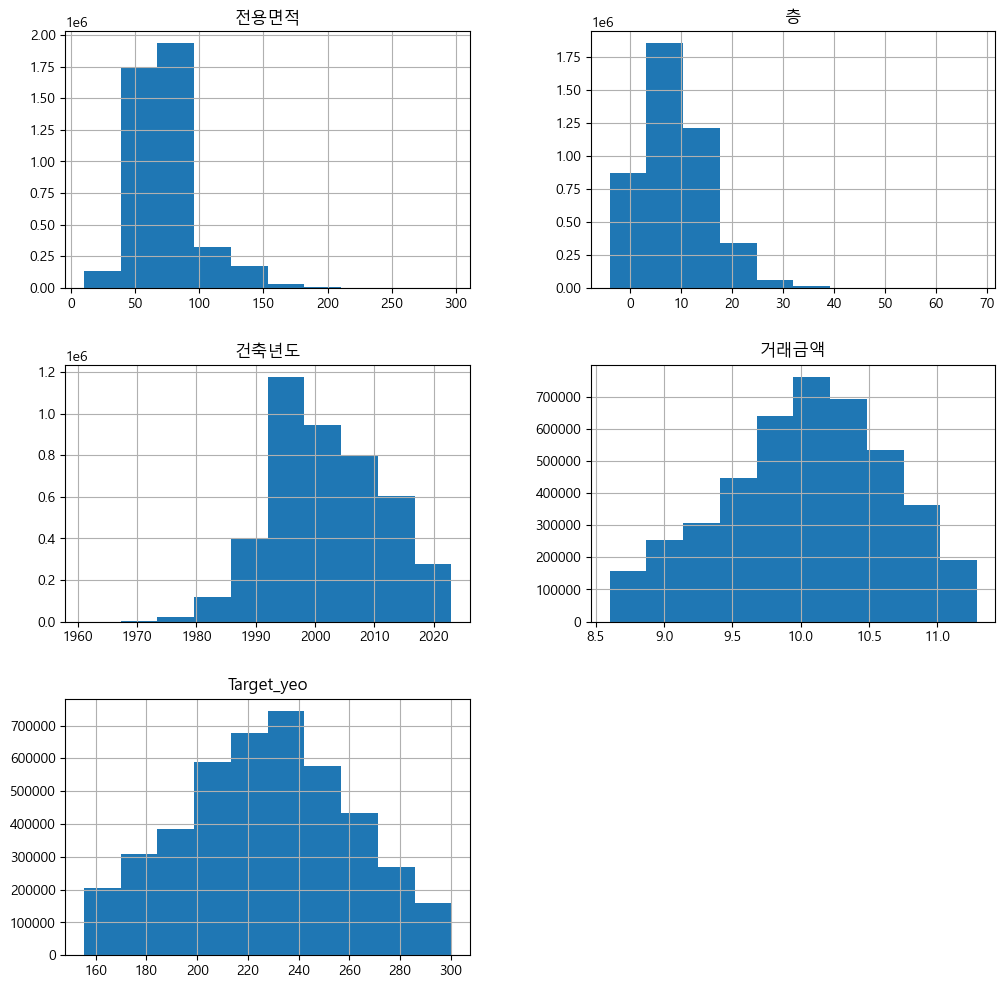

In [97]:
pre_k_df.hist(figsize=(12,12))

In [98]:
pre_k_df = pre_k_df.drop(labels=['거래금액'], axis=1)
pre_k_df

,전용면적,층,건축년도,Target_yeo
0,135.5800,8,1991.0,233.978591
1,101.6000,2,2006.0,250.214113
2,84.9920,11,2007.0,251.833838
3,118.7060,8,2006.0,261.522719
4,84.9636,7,2007.0,255.267726
...,...,...,...,...
4348935,57.1300,6,2019.0,216.849879
4348936,49.8700,2,1999.0,222.585454
4348937,45.3100,1,2000.0,179.646856
4348938,51.8800,2,2003.0,231.421234


In [99]:
from statsmodels.api import OLS

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.020e+08
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:04:11   Log-Likelihood:                     -2.0529e+07
No. Observations:             4348940   AIC:                                  4.106e+07
Df Residuals:                 4348937   BIC:                                  4.106e+07
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [100]:
get_vif(features)

,vif_score,feature
0,10.774279,전용면적
1,3.273722,층
2,11.865724,건축년도


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [102]:
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 701.2177, RMSE: 26.4805, MSLE: 0.0140, RMSLE: 0.1184, R2: 0.3497


In [103]:
prediction = l_r.predict([[74.3100, 5, 1980]])
print(prediction)

[207.29008889]


In [104]:
ptf.inverse_transform(prediction.reshape(-1, 1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[9.69606647]])

In [106]:
ptf.inverse_transform(pre_k_df.loc[0:, 'Target_yeo'][0].reshape(-1, 1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[10.1924563]])

In [107]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [108]:
prediction = l_r.predict(X_test)
get_evaluation(y_test.values, prediction)

MSE: 669.6717, RMSE: 25.8780, MSLE: 0.0134, RMSLE: 0.1156, R2: 0.3789
